In [1]:
import os
os.chdir('..')

In [2]:
from team_functions import *

In [3]:
import matplotlib.pyplot as plt

In [4]:
options = Options()
options.add_argument('--headless')
driver = Firefox(options=options)

In [5]:
url = 'https://www.basketball-reference.com/boxscores/'
soup = getSoup(url, driver=driver)
driver.close()

In [6]:
summaries = soup.find('div', {'class': 'game_summaries'})
games = summaries.findAll('table', {'class': 'teams'})

games_df = []
for idx, game in enumerate(games):
    loser = game.find('tr', {'class': 'loser'}).find('td').find('a').get('href').split('/')[2]
    winner = game.find('tr', {'class': 'winner'}).find('td').find('a').get('href').split('/')[2]
    
    game_row = {'Winner': winner, 'Loser': loser}
    games_df.append(game_row)
    
games_df = pd.DataFrame(games_df)

In [7]:
games_df

,Winner,Loser
0,ATL,UTA
1,BOS,PHI
2,DET,CHI
3,CLE,DAL
4,MIL,CHO
5,MIN,SAS
6,NOP,NYK
7,OKC,HOU
8,ORL,BRK
9,MIA,POR


In [8]:
def checkPredictions(games_df, model_name='LR'):
    model_preds = pd.read_excel(f'Predictions/ModelsPredictions/{model_name}.xlsx')
    
    results = []
    for team in model_preds['visitor']:
        if team in list(games_df['Winner']):
            results.append(1)
        elif team in list(games_df['Loser']):
            results.append(0)
        else:
            print(f'Error checking results of team: {team}')

    model_preds['Results'] = np.array(results)
    model_preds['Checking'] = model_preds['Predictions'] == model_preds['Results']
    
    print(f'Accuracy of {model_name}: {np.sum(model_preds["Checking"])/model_preds.shape[0]}')
    
    return model_preds

In [9]:
def predictionHistory(model_preds, model_name='LR'):
    model_history = pd.read_excel(f'Predictions/ModelsHistory/{model_name}.xlsx')
    today = date.today()
    
    dates = list(model_history['Date'])
    balance_history = list(model_history['Balance'])
    win_history = list(model_history['Wins'])
    
    balance, n_wins = balance_history[-1], win_history[-1]
    for game_idx in range(model_preds.shape[0]):
        row = model_preds.iloc[game_idx]
        
        check = row['Checking']
        pred = row['Predictions']
        
        if pred == 1:
            line = row['v_line']
        elif pred == 0:
            line = row['l_line']
        
        bet = balance*0.1
        balance -= bet
        if check:
            income = bet*line
            balance += income
            n_wins += 1
            
        dates.append(today)
        win_history.append(n_wins)
        balance_history.append(balance)
        
    model_history_df = pd.DataFrame({'Date': dates, 'Balance': balance_history, 'Wins': win_history})
    model_history_df.to_excel(f'Predictions/ModelsHistory/{model_name}.xlsx')
    return model_history_df

Accuracy of LR: 0.8181818181818182
# of bets win: 83
% of bets win: 66.93548387096774
Final Balance: 60.906813601602515


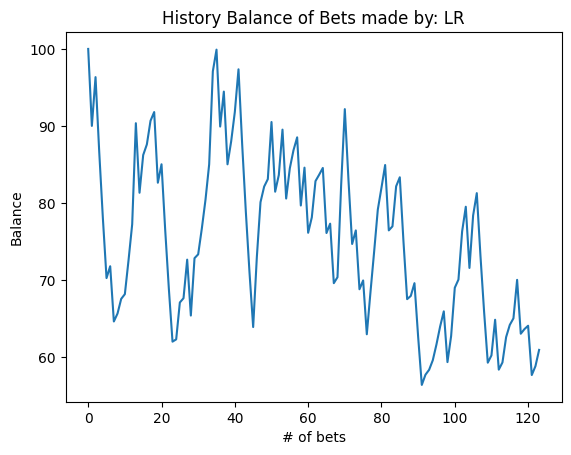

In [10]:
model_name = 'LR'
model_preds = checkPredictions(games_df, model_name)
model_pred_history = predictionHistory(model_preds, model_name)

plt.xlabel('# of bets')
plt.ylabel('Balance')
plt.title(f'History Balance of Bets made by: {model_name}')
plt.plot(model_pred_history['Balance'])
print(f'# of bets win: {list(model_pred_history["Wins"])[-1]}')
print(f'% of bets win: {(list(model_pred_history["Wins"])[-1]/model_pred_history.shape[0])*100}')
print(f'Final Balance: {list(model_pred_history["Balance"])[-1]}')

Accuracy of RF: 0.8181818181818182
# of bets win: 75
% of bets win: 60.483870967741936
Final Balance: 15.223293715651208


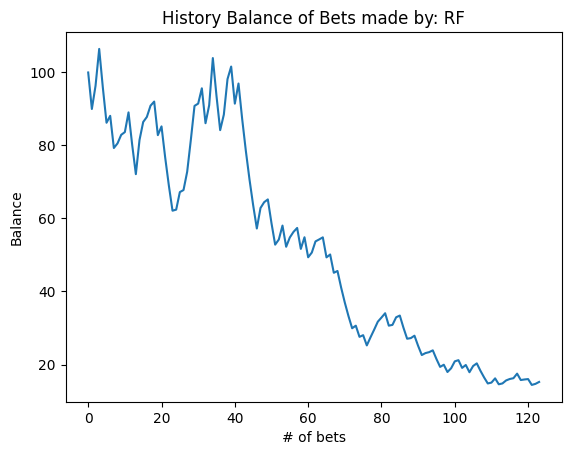

In [11]:
model_name = 'RF'
model_preds = checkPredictions(games_df, model_name)
model_pred_history = predictionHistory(model_preds, model_name)

plt.xlabel('# of bets')
plt.ylabel('Balance')
plt.title(f'History Balance of Bets made by: {model_name}')
plt.plot(model_pred_history['Balance'])
print(f'# of bets win: {list(model_pred_history["Wins"])[-1]}')
print(f'% of bets win: {(list(model_pred_history["Wins"])[-1]/model_pred_history.shape[0])*100}')
print(f'Final Balance: {list(model_pred_history["Balance"])[-1]}')

Accuracy of GB: 0.7272727272727273
# of bets win: 79
% of bets win: 63.70967741935484
Final Balance: 29.04252863959896


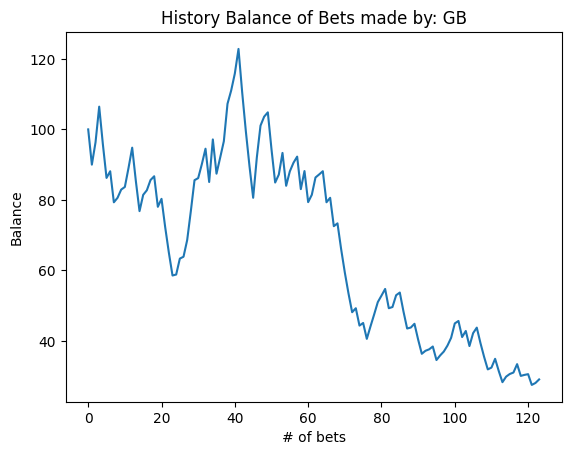

In [12]:
model_name = 'GB'
model_preds = checkPredictions(games_df, model_name)
model_pred_history = predictionHistory(model_preds, model_name)

plt.xlabel('# of bets')
plt.ylabel('Balance')
plt.title(f'History Balance of Bets made by: {model_name}')
plt.plot(model_pred_history['Balance'])
print(f'# of bets win: {list(model_pred_history["Wins"])[-1]}')
print(f'% of bets win: {(list(model_pred_history["Wins"])[-1]/model_pred_history.shape[0])*100}')
print(f'Final Balance: {list(model_pred_history["Balance"])[-1]}')

Accuracy of SVM: 0.8181818181818182
# of bets win: 76
% of bets win: 61.29032258064516
Final Balance: 18.954005824846096


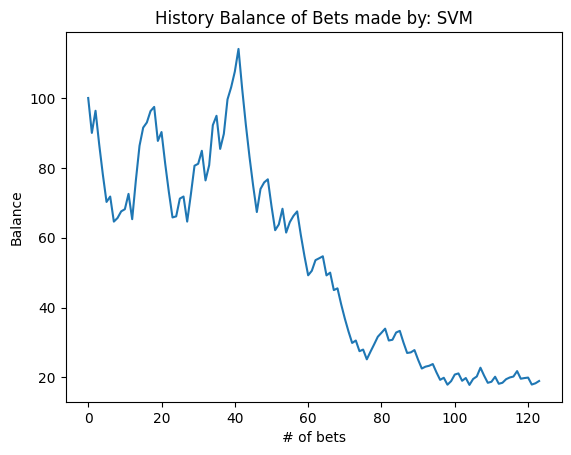

In [13]:
model_name = 'SVM'
model_preds = checkPredictions(games_df, model_name)
model_pred_history = predictionHistory(model_preds, model_name)

plt.xlabel('# of bets')
plt.ylabel('Balance')
plt.title(f'History Balance of Bets made by: {model_name}')
plt.plot(model_pred_history['Balance'])
print(f'# of bets win: {list(model_pred_history["Wins"])[-1]}')
print(f'% of bets win: {(list(model_pred_history["Wins"])[-1]/model_pred_history.shape[0])*100}')
print(f'Final Balance: {list(model_pred_history["Balance"])[-1]}')

Accuracy of FCNN: 0.8181818181818182
# of bets win: 79
% of bets win: 63.70967741935484
Final Balance: 46.03955889120905


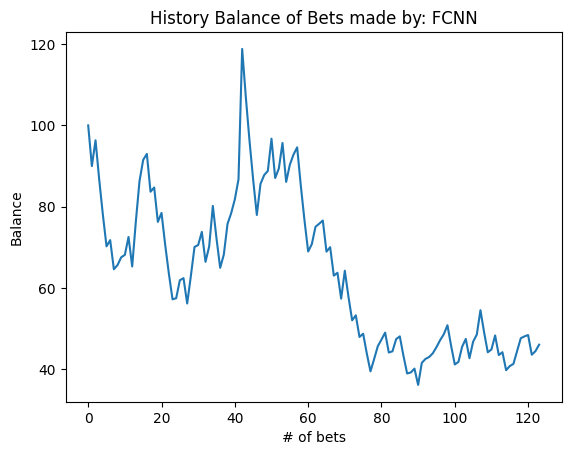

In [14]:
model_name = 'FCNN'
model_preds = checkPredictions(games_df, model_name)
model_pred_history = predictionHistory(model_preds, model_name)

plt.xlabel('# of bets')
plt.ylabel('Balance')
plt.title(f'History Balance of Bets made by: {model_name}')
plt.plot(model_pred_history['Balance'])
print(f'# of bets win: {list(model_pred_history["Wins"])[-1]}')
print(f'% of bets win: {(list(model_pred_history["Wins"])[-1]/model_pred_history.shape[0])*100}')
print(f'Final Balance: {list(model_pred_history["Balance"])[-1]}')

Accuracy of RNN: 0.8181818181818182
# of bets win: 91
% of bets win: 68.42105263157895
Final Balance: 93.39996239134132


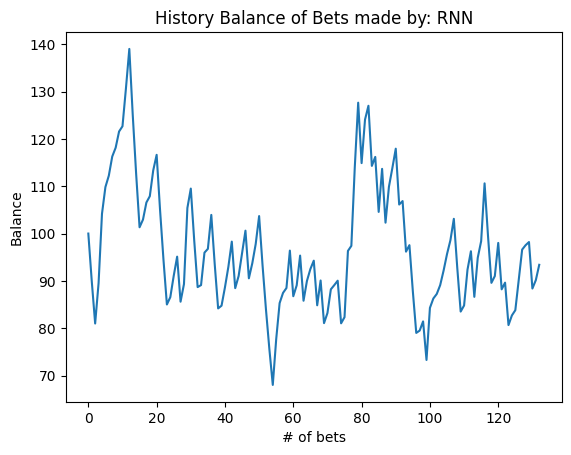

In [15]:
model_name = 'RNN'
model_preds = checkPredictions(games_df, model_name)
model_pred_history = predictionHistory(model_preds, model_name)

plt.xlabel('# of bets')
plt.ylabel('Balance')
plt.title(f'History Balance of Bets made by: {model_name}')
plt.plot(model_pred_history['Balance'])
print(f'# of bets win: {list(model_pred_history["Wins"])[-1]}')
print(f'% of bets win: {(list(model_pred_history["Wins"])[-1]/model_pred_history.shape[0])*100}')
print(f'Final Balance: {list(model_pred_history["Balance"])[-1]}')